Find the minimum value of function:

\begin{align}
f{(x_1,x_2)} = -\Bigg|\sin(x_1)\cos(x_2)\exp \bigg( \bigg| 1-\frac{\sqrt{x_1^2 + x_2^2}}{\pi} \bigg|\bigg) \Bigg|
\end{align}

while $ -10 <= x_1 <= 10 $ and $ -10 <= x_2 <= 10 $

In [37]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
def f(x,y):
    return -(abs(np.sin(x)*np.cos(y)*np.exp(abs(1 - (np.sqrt((x ** 2) + (y ** 2))) / np.pi))))

In [3]:
def fitness(x1,x2):
    return 1/f(x1,x2)

In [4]:
def init():
    return ([random.uniform(-10,10),random.uniform(-10,10)])

In [5]:
def velocity (v_i,phi_cognition,phi_social,p_i, x_i, p_g,VMax):
    """
    :param v_i : vektor velocity untuk partikel ke-i 
    :param p_i : vektor nilai fitness terbaik yang dihasilkan sejauh ini oleh partikel ke-i
    :param x_i : posisi partikel ke-i
    :param p_g : vektor nilai fitness terbaik yang dihasilkan sejauh ini 
                 oleh partikel terbaik dalam topologi ketetanggan
                 
    :param phi_cognition = phi 1 : laju belajar untuk komponen cognition (kecerdasan individu)
    :param phi_social = phi 2: laju belajar untuk koponen social (hubungan social antar individu)     
    
    return :velocity terbaru dari partikel ke-i
    
    """
    r = random.uniform(0,1)
    v = [[]]*len(v_i)
    for d in range (len(v)):
        tmp = v_i[d] + phi_cognition * r * np.subtract(p_i[d],x_i[d]) + phi_social * r * np.subtract(p_g[d],x_i[d])
        v[d] = tmp if (-VMax <= tmp <= VMax) else (tmp/abs(tmp))*VMax
    return v     

coordinate   :  [-8.074607   -9.63697128]
minimum value:  -19.197189205780305


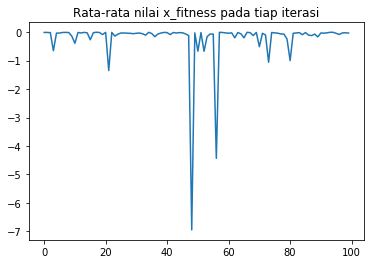

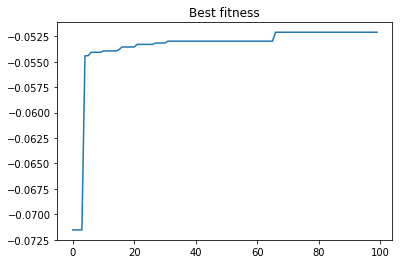

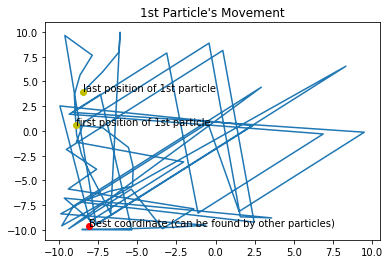

In [201]:
X = []
P = []
V = []
x_fitness = []
p_fitness = []
VMax = 2
phi_cognition = 0.5
phi_social = 0.3
mean_xfitness_history = []
first_particle_best_history = []
history_mean_pfitness = []
history_1st_particle_movements = []

n_partikel = 20
for i in range(n_partikel):
    X.append(init())
    P.append(X[-1][:])
    V.append([random.uniform(-VMax,VMax),random.uniform(-VMax,VMax)])
    x_fitness.append([fitness(X[-1][0],X[-1][1]),i])
    p_fitness.append(x_fitness[-1][:])

for iterasi in range (100): #change soon
    history_1st_particle_movements.append(X[0]) #plot    
    mean_xfitness_history.append(sum(fit[0] for fit in x_fitness)/len(x_fitness)) #plot
    
    for partikel in range (n_partikel):
        x_fitness[partikel][0] = fitness(X[partikel][0],X[partikel][1])
        if (x_fitness[partikel] > p_fitness[partikel]):
            P[partikel] = X[partikel][:]
            p_fitness[partikel] = x_fitness[partikel][:]
    gbest = P[max(p_fitness)[1]]
    history_mean_pfitness.append(fitness(gbest[0],gbest[1])) #plot
#     first_particle_best_history.append(gbest)
    for partikel in range (n_partikel):
        V[partikel] = velocity(V[partikel],phi_cognition,phi_social,P[partikel],X[partikel],gbest,VMax)
        X[partikel] = np.add(X[partikel],V[partikel])
        for i in range(len(X[partikel])):
            while X[partikel][i] > 10 or X[partikel][i] < -10:
                X[partikel][i] = random.uniform(-10,10)
                
                
                
print('coordinate   : ',gbest)
print('minimum value: ',f(gbest[0],gbest[1]))
plt.plot(mean_history)
plt.title("Rata-rata nilai x_fitness pada tiap iterasi")
plt.show()
plt.plot (history_mean_pfitness)
plt.title("Best fitness")
plt.show()

plt.plot([x[0] for x in history_1st_particle_movements],
         [x[1] for x in history_1st_particle_movements])

plt.plot(history_1st_particle_movements[0][0],
         history_1st_particle_movements[0][1],
         'yo')
plt.annotate("first position of 1st particle",
             xy = (history_1st_particle_movements[0][0],history_1st_particle_movements[0][1]))
plt.plot(history_1st_particle_movements[-1][0],
         history_1st_particle_movements[-1][1],
         'yo')
plt.annotate("last position of 1st particle",
             xy = (history_1st_particle_movements[-1][0],history_1st_particle_movements[-1][1]))
plt.plot(gbest[0],
         gbest[1],
         'ro')
plt.annotate('Best coordinate (can be found by other particles)',xy=(gbest[0],gbest[1]))
plt.title("1st Particle's Movement")
plt.show()
    

In [8]:
X

[array([-9.12790301,  4.39689017]),
 array([-9.09318667,  3.52363118]),
 array([-9.42009157, -6.18629623]),
 array([ 5.66443145, -9.02149445]),
 array([-8.25066711,  3.08107966]),
 array([-4.13753007, -2.10328826]),
 array([ 4.62719152, -2.54746519]),
 array([ 4.28706428, -4.10402745]),
 array([-3.61318445,  1.97948642]),
 array([-8.2456917 , -8.58670561]),
 array([-9.11200982,  1.23762918]),
 array([-9.78792614,  6.96782801]),
 array([2.17462539, 2.55048141]),
 array([-8.59143563, -5.89696257]),
 array([-7.77628703, -6.50905469]),
 array([-8.59736641, -7.24924389]),
 array([-9.59443052, -1.55422127]),
 array([-7.55701442, -4.42298768]),
 array([-9.48310304,  0.59476674]),
 array([-8.14822758, -8.73726288])]

In [9]:
P

[array([-7.93863777,  9.6448742 ]),
 array([-7.10626292, -9.67076944]),
 array([-8.06637719, -9.65545592]),
 array([-8.10183395, -9.83477277]),
 array([-7.90744861, -9.36442086]),
 array([-7.92392054, -9.64544962]),
 [-8.326888329357383, 2.782098551340031],
 array([-8.35276446, -9.53880118]),
 array([1.33629961, 6.59268507]),
 array([-7.19539699, -9.14859135]),
 array([-8.17617354, -9.37775818]),
 array([-8.3260229 , -8.78284965]),
 array([-8.24435743,  5.94063076]),
 array([-8.08158254, -9.66782548]),
 array([-8.20392336, -9.62889271]),
 array([-8.49032546, -9.63178952]),
 array([-4.97030212, -9.98236261]),
 array([-8.04729791, -9.70414108]),
 array([-8.13082703, -9.26492374]),
 array([-8.05122704, -9.62649048])]

In [10]:
V

[[-1.085506277656941, 1.772352161307804],
 [-2.0, -2.0],
 [-0.07815695535494746, -2.0],
 [-2.0, -2.0],
 [-0.0069422259034156095, -2.0],
 [-2.0, -1.8329979264347822],
 [-1.2868454394118394, -1.6858777110591028],
 [-1.7534181087725687, -2.0],
 [-2.0, 2.0],
 [0.7103465910013746, -2.0],
 [-1.1569034089237766, -2.0],
 [-1.4619032437128225, -2.0],
 [-2.0, -0.47767218630731545],
 [0.13088318740954435, -2.0],
 [0.3227226960498699, -2.0],
 [-0.005260069913723207, -2.0],
 [0.4020306280643385, -2.0],
 [0.1434120755707242, -2.0],
 [-0.5017338228656151, -2.0],
 [-0.12480071754541823, -2.0]]

In [11]:
x_fitness

[[-0.21547874908315112, 0],
 [-0.2959043293407511, 1],
 [-2.5149161318500757, 2],
 [-0.13683874228093645, 3],
 [-0.3738334084523411, 4],
 [-0.14473747839695497, 5],
 [-0.8234094546504618, 6],
 [-0.39673957962266293, 7],
 [-0.6154775174159188, 8],
 [-0.09998069081666046, 9],
 [-0.17832790957483788, 10],
 [-0.08090795505042071, 11],
 [-0.616928896160171, 12],
 [-0.2761895806430621, 13],
 [-0.7258025533015439, 14],
 [-0.291426299579718, 15],
 [-0.23037374366639163, 16],
 [-0.2797922743249847, 17],
 [-0.3783583121214094, 18],
 [-0.10930185332116284, 19]]

In [12]:
p_fitness

[[-0.052430704229256456, 0],
 [-0.08381235575679437, 1],
 [-0.052065937857012905, 2],
 [-0.05295014709363928, 3],
 [-0.05512837138933419, 4],
 [-0.0525263703870847, 5],
 [-0.19943999183696637, 6],
 [-0.05505511300958316, 7],
 [-0.3448099895277185, 8],
 [-0.08789647461172345, 9],
 [-0.0546757502024402, 10],
 [-0.08090795505042071, 11],
 [-0.12288521785262305, 12],
 [-0.052079545786677596, 13],
 [-0.05270271050332691, 14],
 [-0.05798359728214633, 15],
 [-0.0952080789991954, 16],
 [-0.052104716932317344, 17],
 [-0.056581196741354464, 18],
 [-0.05210018652728787, 19]]